In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing
import scipy.integrate
import sklearn.discriminant_analysis
import itertools
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold

## Parte 1 

## a.

In [77]:
data=pd.read_csv('Hitters.csv')
data= data.dropna()

In [78]:
salary = np.array(data['Salary'])
hits = np.array(data['Hits'])
years = np.log(np.array(data['Years']))/1000

In [79]:
x=(np.array([hits,years])).T
y=np.array((np.log(salary)))

In [81]:
x_train, x_test, y_train_, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.5)

In [82]:
y_train=[]
for i in range(len(y_train_)):
    y_train.append(int(y_train_[i]))

In [83]:
kf = KFold(n_splits=6)
kf.get_n_splits(x)
KFold(n_splits=6, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x):
    x_train_cv, x_test_cv = x[train_index], x[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

In [84]:
tree_size=np.linspace(1,10,10)
mse_test_=[]
mse_train_=[]
mse_cv_=[]
for i in range(len(tree_size)):
    clf = tree.DecisionTreeClassifier(max_depth=tree_size[i])
    clf=clf.fit(x_train,y_train)
    predict_test=clf.predict(x_test)
    predict_train=clf.predict(x_train)
    predict_train_cv=clf.predict(x_train_cv)
    mse_test = mean_squared_error(y_test, predict_test)
    mse_test_.append(mse_test)
    mse_train = mean_squared_error(y_train, predict_train)
    mse_train_.append(mse_train)
    mse_cv = mean_squared_error(y_train_cv, predict_train_cv)
    mse_cv_.append(mse_cv)
    
    

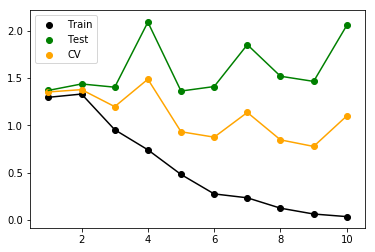

In [99]:
plt.scatter(tree_size,mse_train_,label='Training',color='black')
plt.scatter(tree_size,mse_test_,label='Test',color='green')
plt.scatter(tree_size,mse_cv_,label='Cross Validation',color='orange')
plt.plot(tree_size,mse_cv_,color='orange')
plt.plot(tree_size,mse_train_,color='black')
plt.plot(tree_size,mse_test_,color='green')
plt.legend()

## b.

In [231]:
data=pd.read_csv('reprocessed.hungarian.data.csv',sep=' ')
data= np.array(data.dropna())
x=data[:,:12]
y=data[:,13]

In [232]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.5)

In [233]:
kf = KFold(n_splits=6)
kf.get_n_splits(x)
KFold(n_splits=6, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x):
    x_train_cv, x_test_cv = x[train_index], x[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]

In [234]:
tree_size=np.linspace(1,10,10)
mse_test_=[]
mse_train_=[]
mse_cv_=[]
for i in range(len(tree_size)):
    clf = tree.DecisionTreeClassifier(max_depth=tree_size[i])
    clf=clf.fit(x_train,y_train)
    predict_test=clf.predict(x_test)
    predict_train=clf.predict(x_train)
    predict_train_cv=clf.predict(x_train_cv)
    mse_test = mean_squared_error(y_test, predict_test)
    mse_test_.append(mse_test)
    mse_train = mean_squared_error(y_train, predict_train)
    mse_train_.append(mse_train)
    mse_cv = mean_squared_error(y_train_cv, predict_train_cv)
    mse_cv_.append(mse_cv)

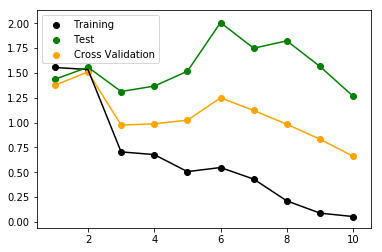

In [235]:
plt.scatter(tree_size,mse_train_,label='Training',color='black')
plt.scatter(tree_size,mse_test_,label='Test',color='green')
plt.scatter(tree_size,mse_cv_,label='Cross Validation',color='orange')
plt.plot(tree_size,mse_cv_,color='orange')
plt.plot(tree_size,mse_train_,color='black')
plt.plot(tree_size,mse_test_,color='green')
plt.legend()

## Segunda Parte

## c.

In [249]:
data=pd.read_csv('OJ.csv')
data= data.dropna()

In [250]:
data.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [251]:
WeekofPurchase=data['WeekofPurchase']
StoreID=data['StoreID']
PriceCH=data['PriceCH'] 
PriceMM=data['PriceMM']
DiscCH=data['DiscCH']
DiscMM=data['DiscMM']
SpecialCH=data['SpecialCH']
SpecialMM=data['SpecialMM'] 
LoyalCH=data['LoyalCH']
SalePriceMM=data['SalePriceMM']
SalePriceCH=data['SalePriceCH']
PriceDiff=data['PriceDiff']
PctDiscMM=data['PctDiscMM']
PctDiscCH=data['PctDiscCH']
ListPriceDiff=data['ListPriceDiff']
STORE=data['STORE']
Purchase=list(data['Purchase'])
purchase=[]
for i in range(len(Purchase)):
    if Purchase[i]=='CH':
        purchase.append(1)
    if Purchase[i]=='MM':
        purchase.append(0)

In [254]:
len(WeekofPurchase)

1070

In [257]:
x=(np.array([WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE])).T
y=np.array(purchase)

In [258]:
np.shape(x),np.shape(y)

((1070, 16), (1070,))

In [260]:
x_trai, x_test, y_trai, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25, random_state=1)

In [261]:
kf = KFold(n_splits=6)
kf.get_n_splits(x_train)
KFold(n_splits=6, random_state=None, shuffle=False)
for train_index, val_index in kf.split(x_train):
    x_train, x_val = x_trai[train_index], x[val_index]
    y_train, y_val = y_trai[train_index], y[val_index]

In [262]:
tree_size=np.linspace(1,15,15)
mse_test_=[]
mse_train_=[]
mse_val_=[]
for i in range(len(tree_size)):
    clf = tree.DecisionTreeClassifier(max_depth=tree_size[i])
    clf=clf.fit(x_train,y_train)
    predict_test=clf.predict(x_test)
    predict_train=clf.predict(x_train)
    predict_val=clf.predict(x_val)
    mse_test = mean_squared_error(y_test, predict_test)
    mse_test_.append(mse_test)
    mse_train = mean_squared_error(y_train, predict_train)
    mse_train_.append(mse_train)
    mse_val = mean_squared_error(y_val, predict_val)
    mse_val_.append(mse_val)

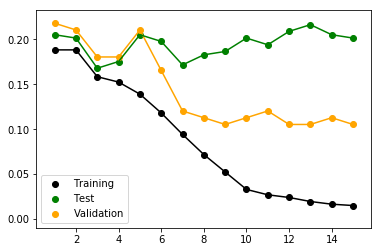

In [263]:
plt.scatter(tree_size,mse_trai_,label='Training',color='black')
plt.scatter(tree_size,mse_test_,label='Test',color='green')
plt.scatter(tree_size,mse_val_,label='Validation',color='orange')
plt.plot(tree_size,mse_val_,color='orange')
plt.plot(tree_size,mse_trai_,color='black')
plt.plot(tree_size,mse_test_,color='green')
plt.legend()

In [265]:
def summary_fit(X, Y, f_method, plot=True):
    # Split in train and test
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.4)

    #  Fit with train
    f_method.fit(X_train, Y_train)

    # Predict with test
    predict = f_method.predict(X_test)

    # This is the probability for the '+' class
    proba_yes = f_method.predict_proba(X_test)[:,1]

    # loop over n_p different values for the threshold probabiity
    n_p = 100
    error_rate = np.zeros(n_p)
    precision = np.zeros(n_p)
    recall = np.zeros(n_p)
    tp_rate = np.zeros(n_p)
    fp_rate = np.zeros(n_p)
    threshold = np.linspace(0,0.99, n_p)

    for i in range(n_p):
        ii = proba_yes>threshold[i]
        predict[ii] = 'Yes'
        predict[~ii] = 'No'
        true_positive = (Y_test == 'Yes') & (predict == 'Yes') 
        false_positive = (Y_test == 'No') & (predict == 'Yes')
        false_negative = (Y_test == 'Yes') & (predict == 'No')
        true_negative = (Y_test == 'No') & (predict == 'No')
        n_tp = np.count_nonzero(true_positive)
        n_fp= np.count_nonzero(false_positive)
        n_fn = np.count_nonzero(false_negative)
        n_tn = np.count_nonzero(true_negative)
        if((n_tp+n_fp)>0): precision[i] = n_tp/(n_tp + n_fp)
        if((n_tp+n_fn)>0): recall[i] = n_tp/(n_tp + n_fn); tp_rate[i] = recall[i]  
        if((n_fp+n_tn)>0): fp_rate[i] = n_fp/(n_fp+n_tn)

    # compute the area under each curve
    ii = np.argsort(recall)
    pr_area = scipy.integrate.trapz(precision[ii], recall[ii])
    
    ii = np.argsort(fp_rate)
    roc_area = scipy.integrate.trapz(tp_rate[ii], fp_rate[ii])
            
    # compute F1
    F1 = np.max(2.0*precision*recall/(precision+recall+1E-12))
    if plot:
        l = 'Predictors:'
        for k in X.keys(): 
            l=l+' '+k
        
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.plot(recall, precision)
        plt.xlabel('RECALL')
        plt.ylabel('PRECISION')
        plt.title('PRECISION-RECALL, AREA={:.2f}'.format(pr_area))
        plt.xlim([0,1])
        plt.ylim([0,1])

        plt.subplot(1,2,2)
        plt.plot(fp_rate, tp_rate, label=l)
        plt.xlabel('FALSE POSITIVE RATE')
        plt.ylabel('TRUE POSITIVE RATE')
        plt.title('ROC, AREA={:.2f}'.format(roc_area))
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.legend()
    return {'pr_area':pr_area, 'roc_area':roc_area, 'F1':F1}